#Globel Air Pollution
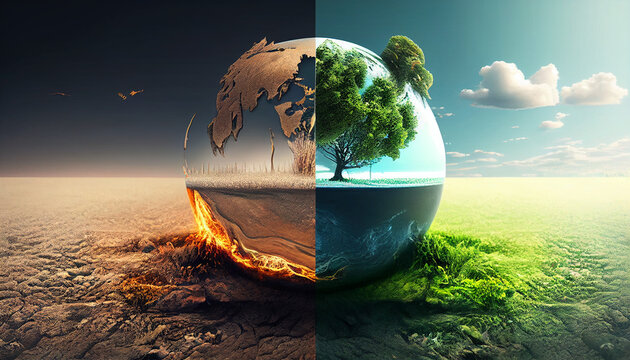

#  Problem Statement

This project analyzed global air pollution data, uncovering critical variability and patterns in air quality over different countries and cities. By utilizing statistical strategies and visualizations, we distinguished key pollutants affecting AQI values and highlighted regions with critical air quality issues. Our discoveries support data-driven policy interventions and open awareness efforts to relieve air pollution globally.

#Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Dataset
An analysis of the globel pollution based on the kaggle dataset [Global Air Pollution](https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset)

**Total number of rows:** 23463

**Total number of columns:** 12

**Country :** Name of the country

**City :** Name of the city

**AQI Value :** Overall AQI value of the city

**AQI Category :** Overall AQI category of the city

**CO AQI Value :** AQI value of Carbon Monoxide of the city

**CO AQI Category :** AQI category of Carbon Monoxide of the city

**Ozone AQI Value :** AQI value of Ozone of the city

**Ozone AQI Category :** AQI category of Ozone of the city

**NO2 AQI Value :** AQI value of Nitrogen Dioxide of the city

**NO2 AQI Category :** AQI category of Nitrogen Dioxide of the city

**PM2.5 AQI Value :** AQI value of Particulate Matter with a diameter of 2.5 micrometers or less of the city

**PM2.5 AQI Category :** AQI category of Particulate Matter with a diameter of 2.5 micrometers or less of the city



In [ ]:
data = pd.read_csv("/content/global air pollution dataset.csv")

In [ ]:
data.head()

Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good               39               Good              2   
3            Good               34               Good              0   
4            Good               22               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  
0             Good               51           Moderate  
1             Good               41               Good  
2             Good               66           Moderate  
3             Good               20               Good  
4             Good                6               Good

In [ ]:
data.tail()

Country          City  AQI Value AQI Category  \
23458                     India  Gursahaiganj        184    Unhealthy   
23459                    France        Sceaux         50         Good   
23460                     India      Mormugao         50         Good   
23461  United States of America   Westerville         71     Moderate   
23462                  Malaysia        Marang         70     Moderate   

       CO AQI Value CO AQI Category  Ozone AQI Value Ozone AQI Category  \
23458             3            Good              154          Unhealthy   
23459             1            Good               20               Good   
23460             1            Good               22               Good   
23461             1            Good               44               Good   
23462             1            Good               38               Good   

       NO2 AQI Value NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  
23458              2             Good              184          Unhealthy  
23459              5             Good               50               Good  
23460              1             Good               50               Good  
23461              2             Good               71           Moderate  
23462              0             Good               70           Moderate

In [ ]:
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

Number of rows: 23463
Number of columns: 12


In [ ]:
data['Country'].nunique()

175

In [ ]:
data['City'].nunique()

23462

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [ ]:
data.describe()

AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
count  23463.000000  23463.000000     23463.000000   23463.000000   
mean      72.010868      1.368367        35.193709       3.063334   
std       56.055220      1.832064        28.098723       5.254108   
min        6.000000      0.000000         0.000000       0.000000   
25%       39.000000      1.000000        21.000000       0.000000   
50%       55.000000      1.000000        31.000000       1.000000   
75%       79.000000      1.000000        40.000000       4.000000   
max      500.000000    133.000000       235.000000      91.000000   

       PM2.5 AQI Value  
count     23463.000000  
mean         68.519755  
std          54.796443  
min           0.000000  
25%          35.000000  
50%          54.000000  
75%          79.000000  
max         500.000000

In [ ]:
data.describe(include=['object'])

Country        City AQI Category CO AQI Category  \
count                      23036       23462        23463           23463   
unique                       175       23462            6               3   
top     United States of America  Praskoveya         Good            Good   
freq                        2872           1         9936           23460   

       Ozone AQI Category NO2 AQI Category PM2.5 AQI Category  
count               23463            23463              23463  
unique                  5                2                  6  
top                  Good             Good               Good  
freq                21069            23448              10208

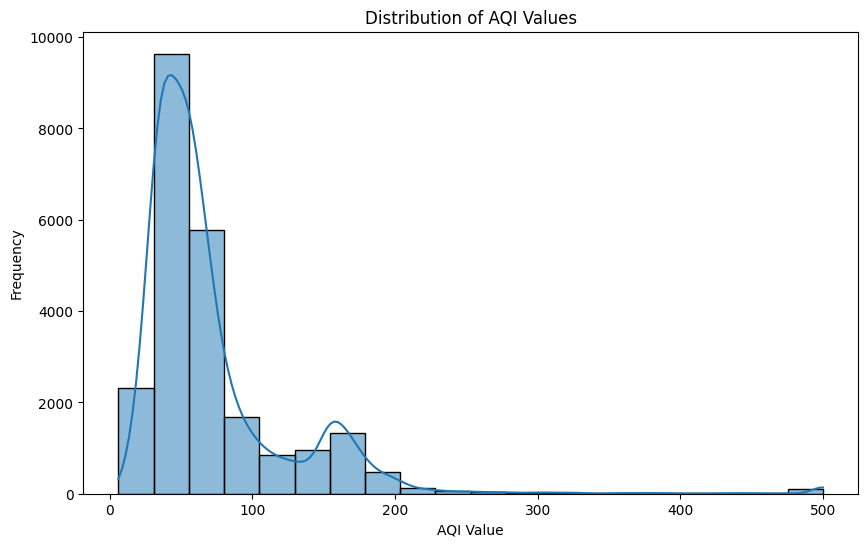

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['AQI Value'], bins=20, kde=True)
plt.title('Distribution of AQI Values')
plt.xlabel('AQI Value')
plt.ylabel('Frequency')
plt.show()

#Data Cleanup & Preprocessing




**Duplicate Detection and Removal**

- We started by checking the dataset for duplicate records using data.duplicated().sum(). This helps identify redundant entries that can skew analysis results.
- Duplicates were removed with data.drop_duplicates(inplace=True), ensuring that each observation is unique and the analysis is accurate.

**Data Type Conversion**

- The AQI values ('AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', and 'PM2.5 AQI Value') were changed over to floating-point numbers for precise calculations and statistical analysis utilizing data[['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].astype(float).

**Missing Values Handling**

- We inspected the dataset for missing values with data.isnull().sum().
- Missing values in the 'City' column were filled with 'Unknown' using data['City'].fillna('Unknown', inplace=True), ensuring that city information is not entirely lost.
- Rows with missing 'Country' values were removed using data.dropna(subset=['Country'], inplace=True). This ensures that the dataset remains reliable for country-based analysis.
- A final check was conducted to ensure no critical missing values remained (data.isnull().sum()).

**Outlier Detection and Removal**

- Boxplots of the AQI variables were generated using sns.boxplot() to visually inspect the data for outliers, which are extreme values that can distort the analysis.
- Z-scores were computed for each AQI variable using scipy.stats.zscore, which standardizes the data to identify outliers.
- Outliers were defined as any data points with a Z-score greater than 3 (threshold) and were removed. This process helps in making the dataset more robust and less sensitive to extreme values.
- A second set of boxplots was generated to confirm the removal of outliers and to check the revised distribution of AQI values.

**Descriptive Statistics**

- We provided descriptive statistics (data_cleaned.describe()) to summarize the central propensity, scattering, and shape of the dataset's distribution.
- This incorporates metrics like mean, standard deviation, min, max, and quartiles, offering a point-by-point outline of the dataset's characteristics post-cleanup.


By cleaning and preprocessing the data, we guaranteed the dataset was exact, steady, and prepared for important analysis. This foundational step is vital because it specifically impacts the quality and unwavering quality of consequent analytical steps.

In [ ]:
data.duplicated().sum()

0

The code checks for and counts the number of duplicated rows in the dataset to identify and handle any potential data redundancy issues, ensuring data integrity and accuracy in subsequent analysis steps.



In [ ]:
data['AQI Value'].value_counts()

AQI Value
50     483
35     473
34     446
39     433
36     427
      ... 
256      1
405      1
236      1
376      1
253      1
Name: count, Length: 347, dtype: int64

This code counts the frequency of unique values in the "AQI Value" column, providing insight into the distribution of air quality index (AQI) values across the dataset.

In [ ]:
data[data['AQI Value'] >300]

Country          City  AQI Value AQI Category  CO AQI Value  \
180           India    Govindgarh        307    Hazardous             1   
276        Pakistan  Bahawalnagar        500    Hazardous             1   
277    South Africa       Balfour        380    Hazardous            31   
417           India      Phillaur        444    Hazardous             2   
439           India         Salon        303    Hazardous             1   
...             ...           ...        ...          ...           ...   
22560         India      Miranpur        464    Hazardous             4   
22577         India        Bahjoi        500    Hazardous             1   
22824         India        Bilari        500    Hazardous             4   
22842         India  Sikandarabad        500    Hazardous             2   
23201        Mexico  Tlalancaleca        355    Hazardous             4   

      CO AQI Category  Ozone AQI Value              Ozone AQI Category  \
180              Good               45                            Good   
276              Good               38                            Good   
277              Good                1                            Good   
417              Good              111  Unhealthy for Sensitive Groups   
439              Good               48                            Good   
...               ...              ...                             ...   
22560            Good              171                       Unhealthy   
22577            Good               53                        Moderate   
22824            Good              158                       Unhealthy   
22842            Good               42                            Good   
23201            Good                4                            Good   

       NO2 AQI Value NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  
180                0             Good              307          Hazardous  
276                1             Good              466          Hazardous  
277               26             Good              380          Hazardous  
417                1             Good              391          Hazardous  
439                0             Good              260     Very Unhealthy  
...              ...              ...              ...                ...  
22560              5             Good              407          Hazardous  
22577              1             Good              447          Hazardous  
22824              4             Good              457          Hazardous  
22842              3             Good              500          Hazardous  
23201             17             Good              355          Hazardous  

[190 rows x 12 columns]

This code filters the dataset to select rows where the AQI Value is greater than 300, indicating extremely poor air quality conditions.








In [ ]:
data[['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']] = data[['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].astype(float)


This code converts specific columns related to AQI values to the float data type, ensuring consistency and enabling numerical operations and analysis on these variables.








In [ ]:
data

Country              City  AQI Value AQI Category  \
0            Russian Federation        Praskoveya       51.0     Moderate   
1                        Brazil  Presidente Dutra       41.0         Good   
2                         Italy   Priolo Gargallo       66.0     Moderate   
3                        Poland         Przasnysz       34.0         Good   
4                        France          Punaauia       22.0         Good   
...                         ...               ...        ...          ...   
23458                     India      Gursahaiganj      184.0    Unhealthy   
23459                    France            Sceaux       50.0         Good   
23460                     India          Mormugao       50.0         Good   
23461  United States of America       Westerville       71.0     Moderate   
23462                  Malaysia            Marang       70.0     Moderate   

       CO AQI Value CO AQI Category  Ozone AQI Value Ozone AQI Category  \
0               1.0            Good             36.0               Good   
1               1.0            Good              5.0               Good   
2               1.0            Good             39.0               Good   
3               1.0            Good             34.0               Good   
4               0.0            Good             22.0               Good   
...             ...             ...              ...                ...   
23458           3.0            Good            154.0          Unhealthy   
23459           1.0            Good             20.0               Good   
23460           1.0            Good             22.0               Good   
23461           1.0            Good             44.0               Good   
23462           1.0            Good             38.0               Good   

       NO2 AQI Value NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  
0                0.0             Good             51.0           Moderate  
1                1.0             Good             41.0               Good  
2                2.0             Good             66.0           Moderate  
3                0.0             Good             20.0               Good  
4                0.0             Good              6.0               Good  
...              ...              ...              ...                ...  
23458            2.0             Good            184.0          Unhealthy  
23459            5.0             Good             50.0               Good  
23460            1.0             Good             50.0               Good  
23461            2.0             Good             71.0           Moderate  
23462            0.0             Good             70.0           Moderate  

[23463 rows x 12 columns]

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64


In [ ]:
data['City'].fillna('Unknown', inplace=True)

In [ ]:
data.dropna(subset=['Country'], inplace=True)

In [ ]:
print("Missing Values after Handling:\n", data.isnull().sum())

Missing Values after Handling:
 Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64


This code ensures data integrity by removing duplicate entries and handling missing values, filling 'City' missing values with 'Unknown' and removing rows with missing 'Country' values.








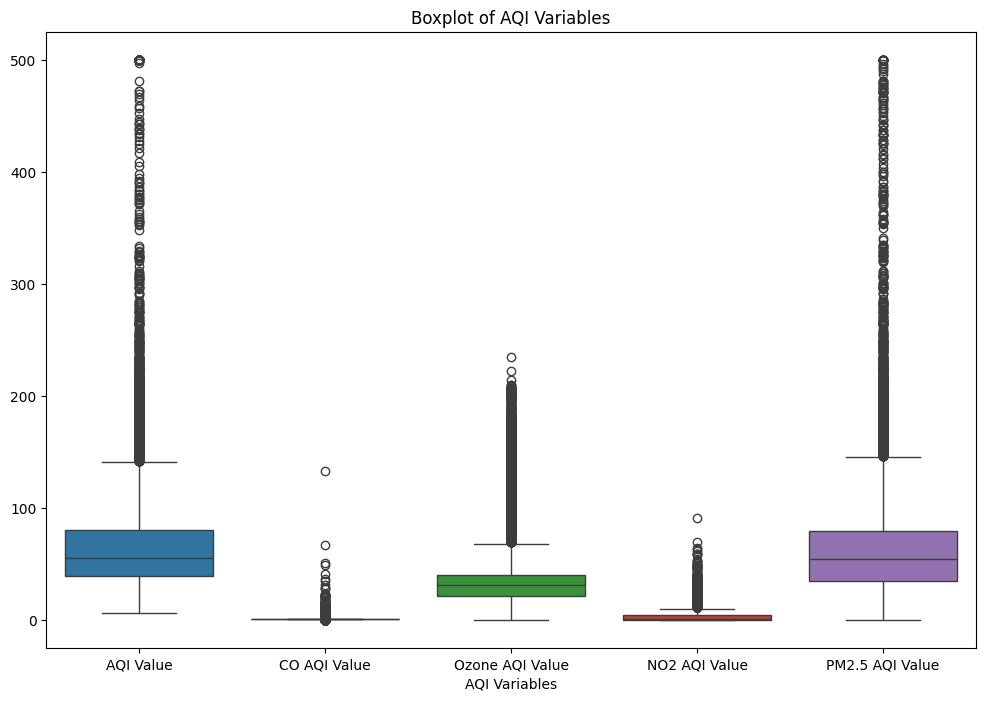

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']])
plt.title('Boxplot of AQI Variables')
plt.xlabel('AQI Variables')
plt.show()

This boxplot visualizes the distribution of AQI variables, providing insights into their central tendency, spread, and outliers, aiding in identifying variations in air quality measurements.








In [ ]:
from scipy.stats import zscore
z_scores = zscore(data[['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']])
threshold = 3
outlier_indices = (abs(z_scores) > threshold).any(axis=1)
data_cleaned = data[~outlier_indices]

It identifies and removes outliers from the dataset based on z-scores calculated for AQI variables, ensuring a cleaner dataset for further analysis.








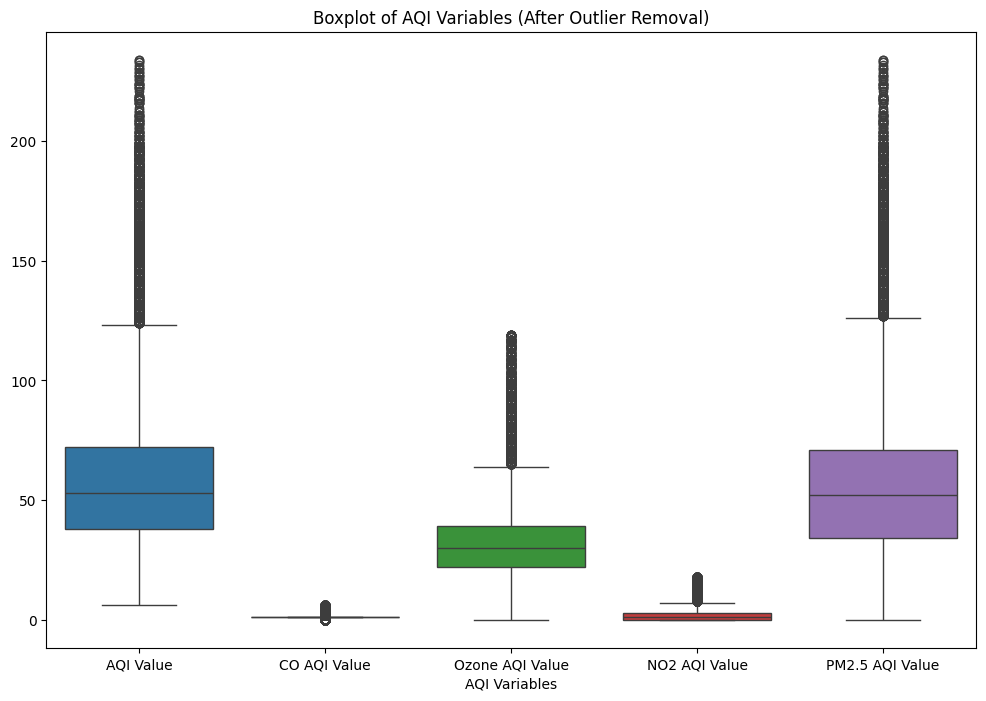

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_cleaned[['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']])
plt.title('Boxplot of AQI Variables (After Outlier Removal)')
plt.xlabel('AQI Variables')
plt.show()

This boxplot visualizes AQI variables from the cleaned dataset after removing outliers, offering insights into the distribution of air quality parameters without the influence of extreme values.








In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("Descriptive Statistics:\n", data_cleaned.describe())

Descriptive Statistics:
           AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
count  21366.000000  21366.000000     21366.000000   21366.000000   
mean      63.299261      1.148273        31.490124       2.430825   
std       37.859508      0.856365        16.498392       3.427326   
min        6.000000      0.000000         0.000000       0.000000   
25%       38.000000      1.000000        22.000000       0.000000   
50%       53.000000      1.000000        30.000000       1.000000   
75%       72.000000      1.000000        39.000000       3.000000   
max      234.000000      6.000000       119.000000      18.000000   

       PM2.5 AQI Value  
count     21366.000000  
mean         60.631939  
std          39.811435  
min           0.000000  
25%          34.000000  
50%          52.000000  
75%          71.000000  
max         234.000000  


This descriptive statistics displays for the cleaned dataset, including measures such as mean, standard deviation, minimum, maximum, and quartiles for each AQI variable. It provides a summary of the distribution and central tendency of air quality parameters after removing outliers.

#Data Exploration

**Distribution of AQI Values**

We plotted the distribution of AQI values employing a histogram (sns.histplot) to visualize the recurrence of distinctive AQI levels. This helps us understand how AQI values are spread across the dataset and identify common air quality levels.

**Distribution of AQI Categories**

A count plot of AQI categories (sns.countplot) was made to show the recurrence of each discussed quality category (e.g., Good, Moderate, Unhealthy). This reveals how air quality is typically categorized in different regions.

**AQI Values Across Top Countries**

We identified the top 10 countries with the highest average AQI values using data.groupby('Country')['AQI Value'].mean().nlargest(10).
Box plots (sns.boxplot) were generated to compare AQI values across these top countries, highlighting differences and variations in air quality between countries.

**Average AQI Values by Country**

A bar plot was used to display the average AQI values across the top 10 countries, providing a clear comparison of air quality levels between nations.

**AQI Values Across Top Cities**

Similar to the country analysis, we identified the top 10 cities with the highest average AQI values and plotted these using bar plots. This helps pinpoint urban areas with the most severe air quality issues.

**Scatter Plot of AQI Value vs. PM2.5 AQI Value**

A scatter plot (sns.scatterplot) was made to visualize the relationship between PM2.5 levels and overall AQI values. This analysis is crucial since PM2.5 could be a critical pollutant influencing air quality.

**Box Plot of AQI Values Across Categories**

Box plots were used to display the distribution of AQI values within each AQI category. This helps us understand the range and median AQI values for different air quality classifications.

**Correlation Matrix of Pollutants**

We calculated the correlation matrix for different pollutants (CO, Ozone, NO2, PM2.5) using data_cleaned[pollutants].corr(). The correlation matrix was visualized with a heatmap (sns.heatmap) to identify how these pollutants are related to each other. This is important for understanding which pollutants often occur together.

**Pair Plot of AQI Values and Pollutants**

A pair plot (sns.pairplot) was generated to visualize the pairwise relationships between AQI values and various pollutants. This provides a comprehensive view of how different variables interact.

**Interactive Visualizations**

Using Plotly, we created an interactive scatter matrix (px.scatter_matrix) and pie charts (px.pie) to enhance the exploratory analysis with interactive elements, allowing for deeper insights through user interaction.

An interactive map (px.scatter_geo) was created to visualize AQI values by city and country. This map shows geological variations in air quality, giving a global point of view on pollution levels.

By investigating the data through these visualizations, we pick up an intensive understanding of the distribution and patterns in air quality over diverse regions. This helps in distinguishing patterns, outliers, and key factors impacting discussion quality, which are fundamental for making informed decisions and recommendations.




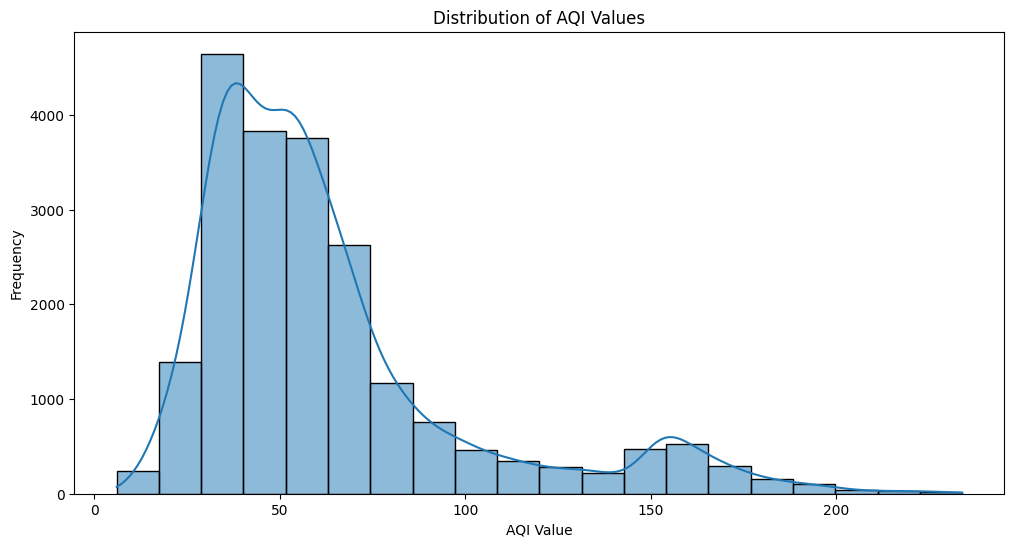

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data_cleaned, x='AQI Value', bins=20, kde=True)
plt.title('Distribution of AQI Values')
plt.xlabel('AQI Value')
plt.ylabel('Frequency')
plt.show()

This plots a histogram to show the distribution of AQI values after removing outliers, aiding in understanding the frequency distribution of air quality.

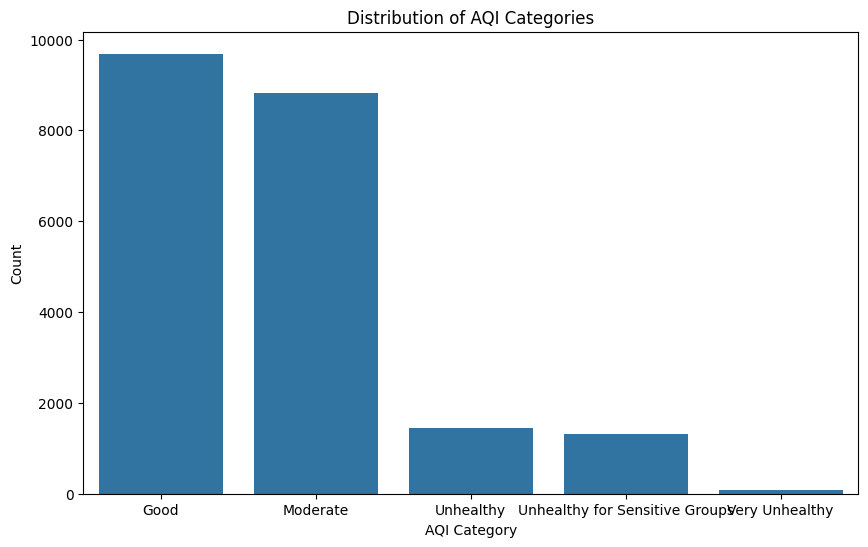

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='AQI Category', order=data_cleaned['AQI Category'].value_counts().index)
plt.title('Distribution of AQI Categories')
plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.show()


This count plot to visualize the distribution of AQI categories after removing outliers, providing insights into the frequency of different air quality categories.








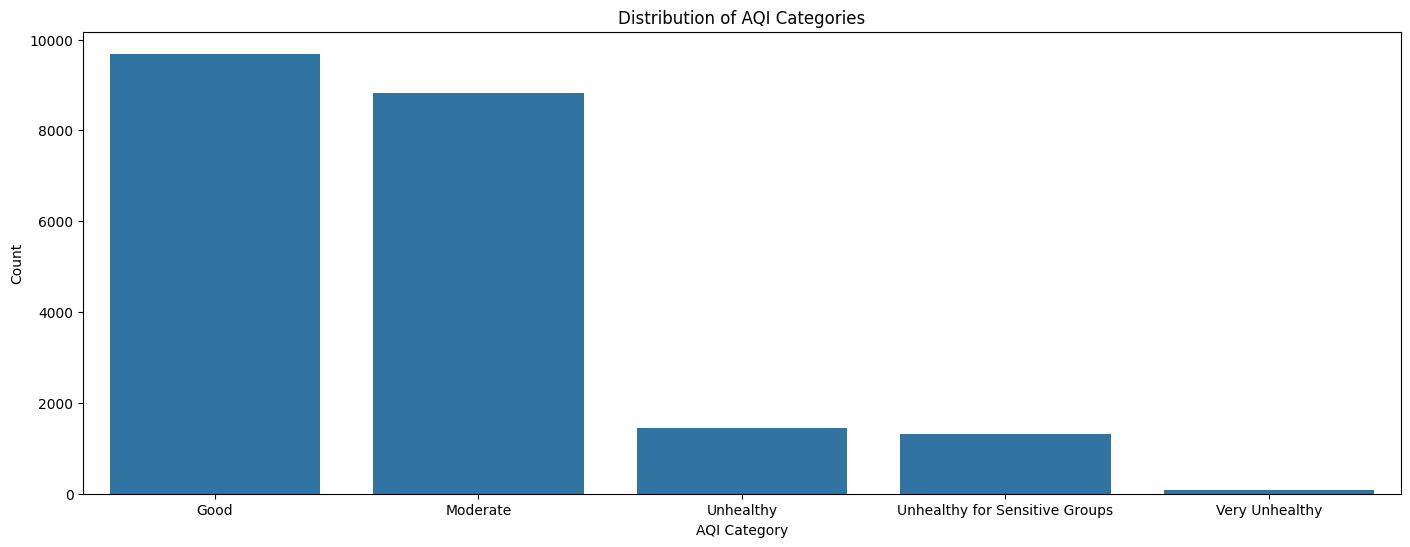

In [ ]:
plt.figure(figsize=(17, 6))
sns.countplot(data=data_cleaned, x='AQI Category', order=data_cleaned['AQI Category'].value_counts().index)
plt.title('Distribution of AQI Categories')
plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.show()


This bar plot to visualize the distribution of AQI categories after removing outliers, showing the count of each AQI category to understand the prevalence of different air quality levels.








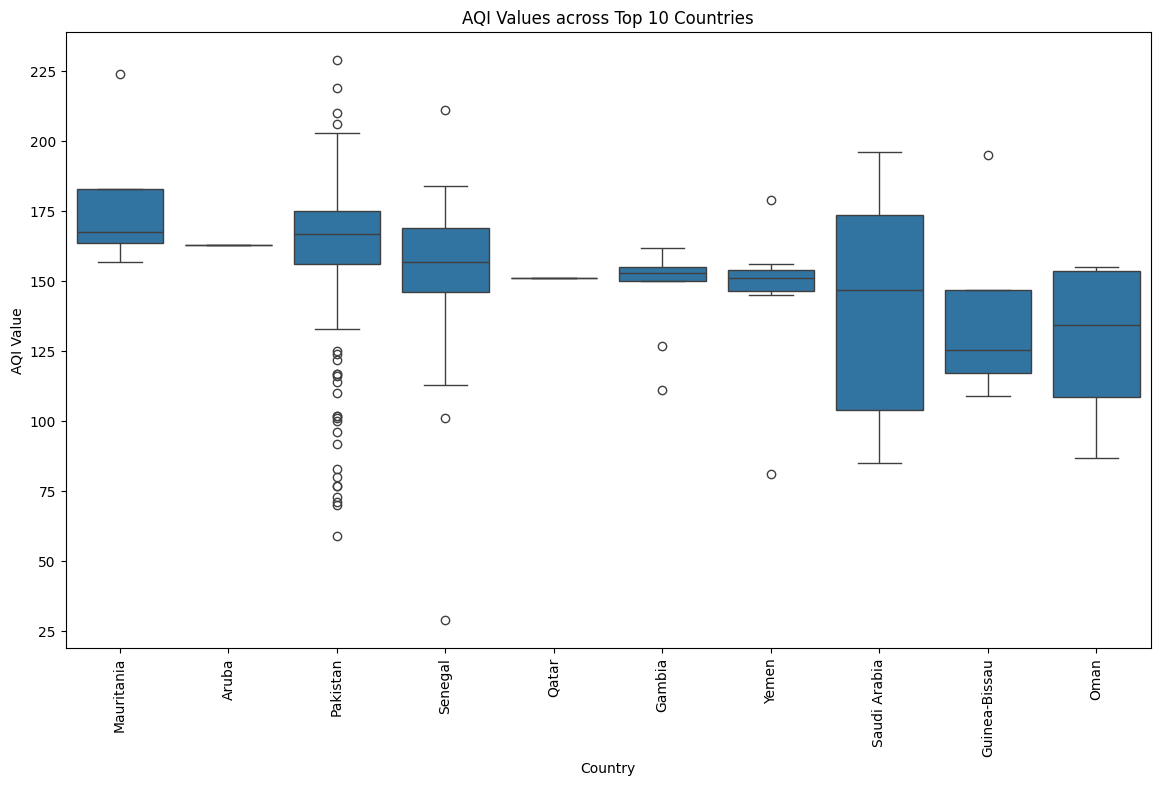

In [ ]:
top_n_countries = 10
top_countries = data_cleaned.groupby('Country')['AQI Value'].mean().nlargest(top_n_countries).index
data_top_countries = data_cleaned[data_cleaned['Country'].isin(top_countries)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=data_top_countries, x='Country', y='AQI Value', order=top_countries)
plt.title(f'AQI Values across Top {top_n_countries} Countries')
plt.xlabel('Country')
plt.ylabel('AQI Value')
plt.xticks(rotation=90)
plt.show()


This selects the top N countries with the highest average AQI values, filters the dataset to include only data for these countries, and visualizes the distribution of AQI values across these countries using box plots.

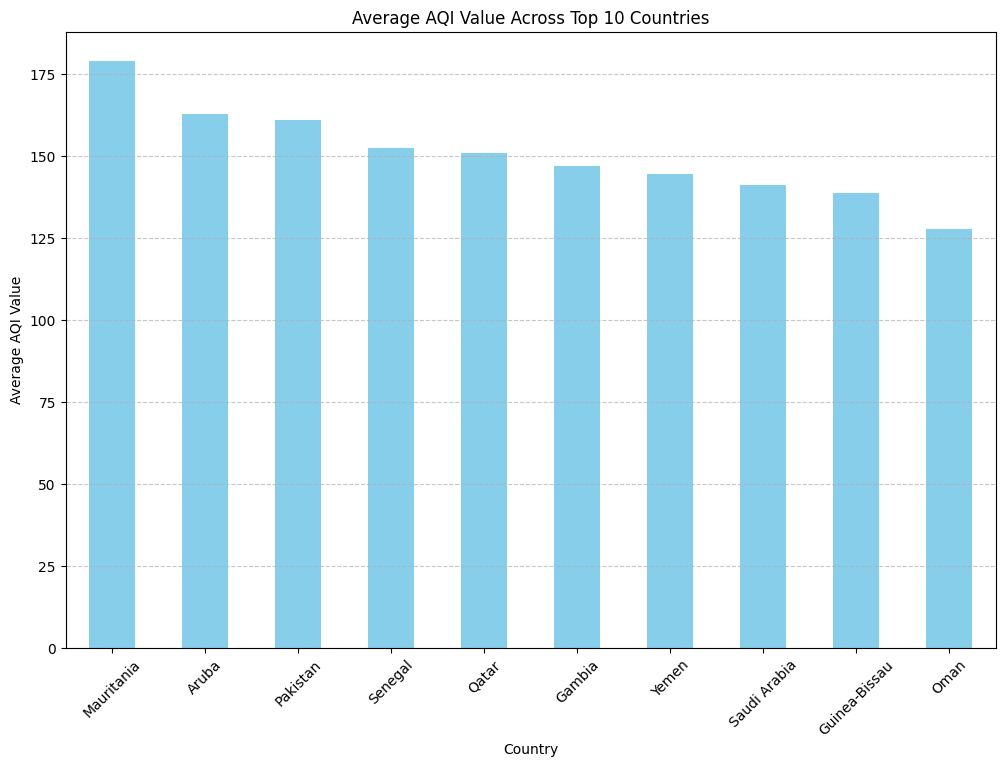

In [ ]:
mean_aqi_by_country = data_cleaned.groupby('Country')['AQI Value'].mean().nlargest(top_n_countries)

plt.figure(figsize=(12, 8))
mean_aqi_by_country.plot(kind='bar', color='skyblue')
plt.title(f'Average AQI Value Across Top {top_n_countries} Countries')
plt.xlabel('Country')
plt.ylabel('Average AQI Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This calculates the mean AQI value for each country, selects the top N countries with the highest average AQI values, and visualizes the average AQI values across these countries using a bar plot.

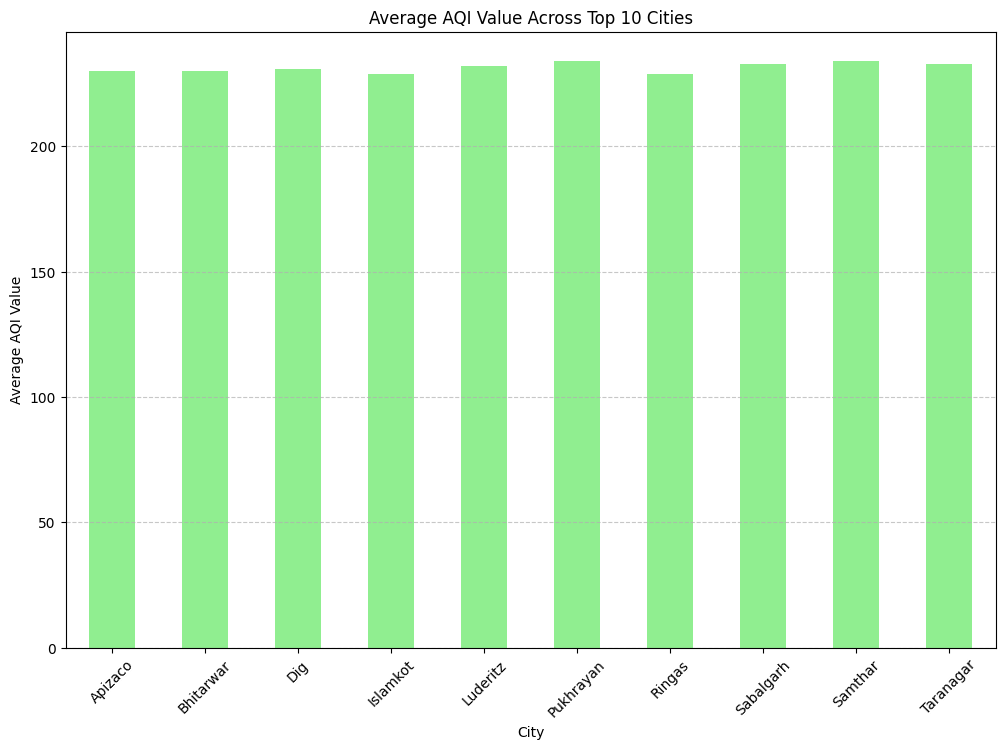

In [ ]:
top_n_cities = 10
top_cities = data_cleaned.groupby('City')['AQI Value'].mean().nlargest(top_n_cities).index
data_top_cities = data_cleaned[data_cleaned['City'].isin(top_cities)]
mean_aqi_by_city = data_top_cities.groupby('City')['AQI Value'].mean()

plt.figure(figsize=(12, 8))
mean_aqi_by_city.plot(kind='bar', color='lightgreen')
plt.title(f'Average AQI Value Across Top {top_n_cities} Cities')
plt.xlabel('City')
plt.ylabel('Average AQI Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


This calculates the mean AQI value for each city, selects the top N cities with the highest average AQI values, and visualizes the average AQI values across these cities using a bar plot.








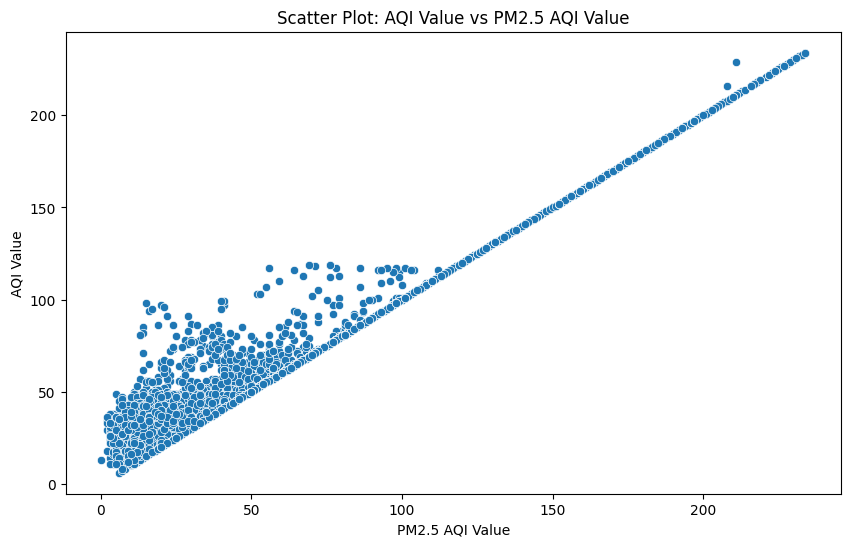

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x='PM2.5 AQI Value', y='AQI Value')
plt.title('Scatter Plot: AQI Value vs PM2.5 AQI Value')
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('AQI Value')
plt.show()

Create a scatter plot to visualize the relationship between the AQI value and the PM2.5 AQI value.

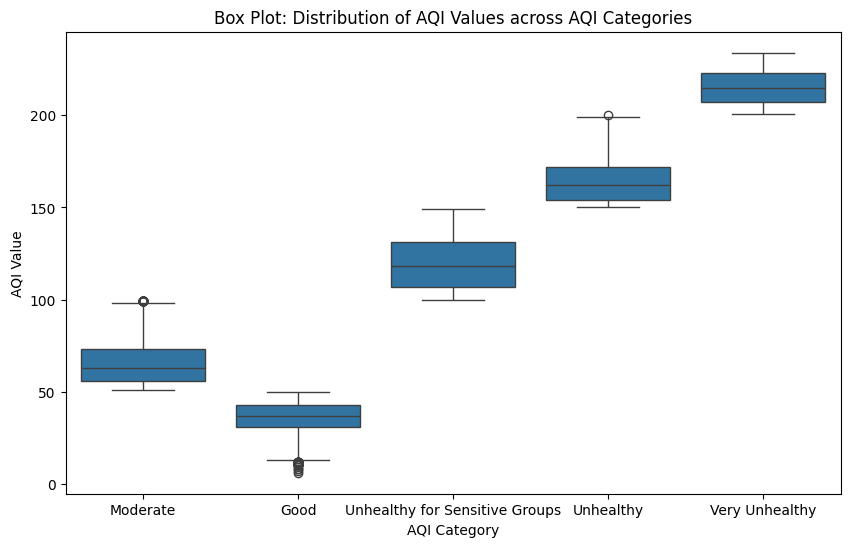

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned, x='AQI Category', y='AQI Value')
plt.title('Box Plot: Distribution of AQI Values across AQI Categories')
plt.xlabel('AQI Category')
plt.ylabel('AQI Value')
plt.show()

This creates box plot to illustrate the distribution of AQI values across different AQI categories.

<Axes: ylabel='Ozone AQI Value'>

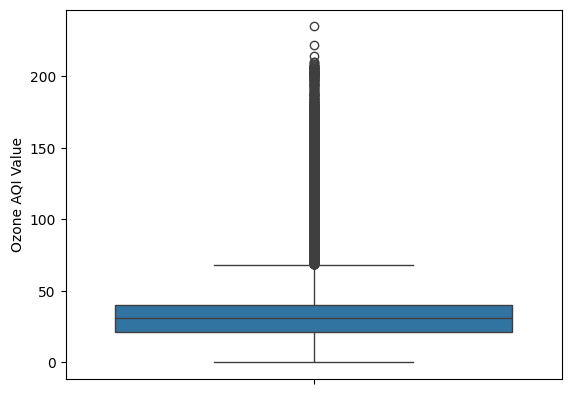

In [ ]:
sns.boxplot(data=data['Ozone AQI Value'])

This create a box plot to visualize the distribution of AQI values specifically for ozone (O3) concentration.

<Axes: ylabel='PM2.5 AQI Value'>

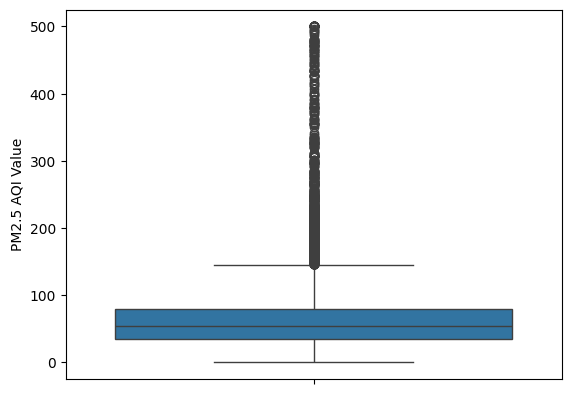

In [ ]:
sns.boxplot(data=data['PM2.5 AQI Value'])

This create a box plot to visualize the distribution of AQI values specifically for fine particulate matter (PM2.5) concentration.

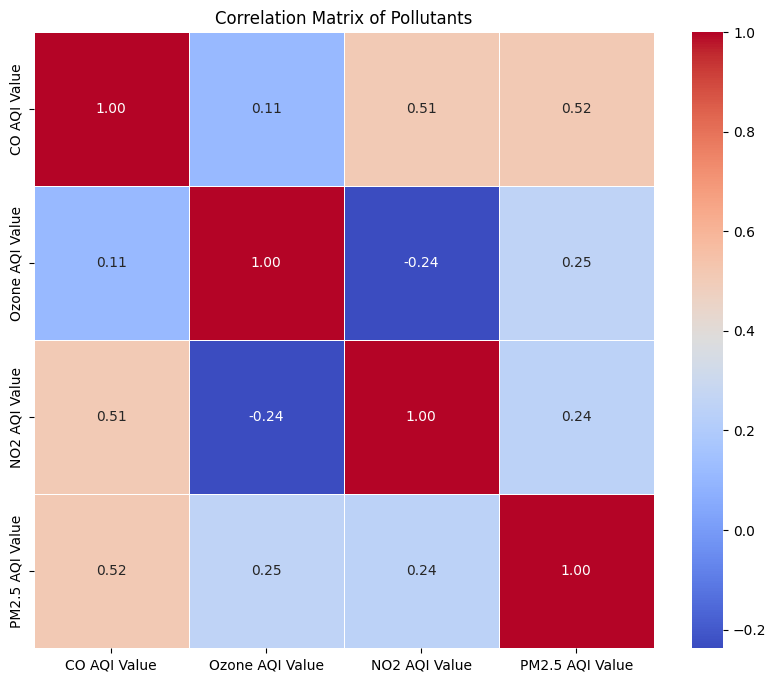

In [ ]:
pollutants = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
correlation_matrix = data_cleaned[pollutants].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Pollutants')
plt.show()


This creates a heatmap to visualize the correlation matrix of air quality index (AQI) values for different pollutants, including carbon monoxide (CO), ozone (O3), nitrogen dioxide (NO2), and fine particulate matter (PM2.5).

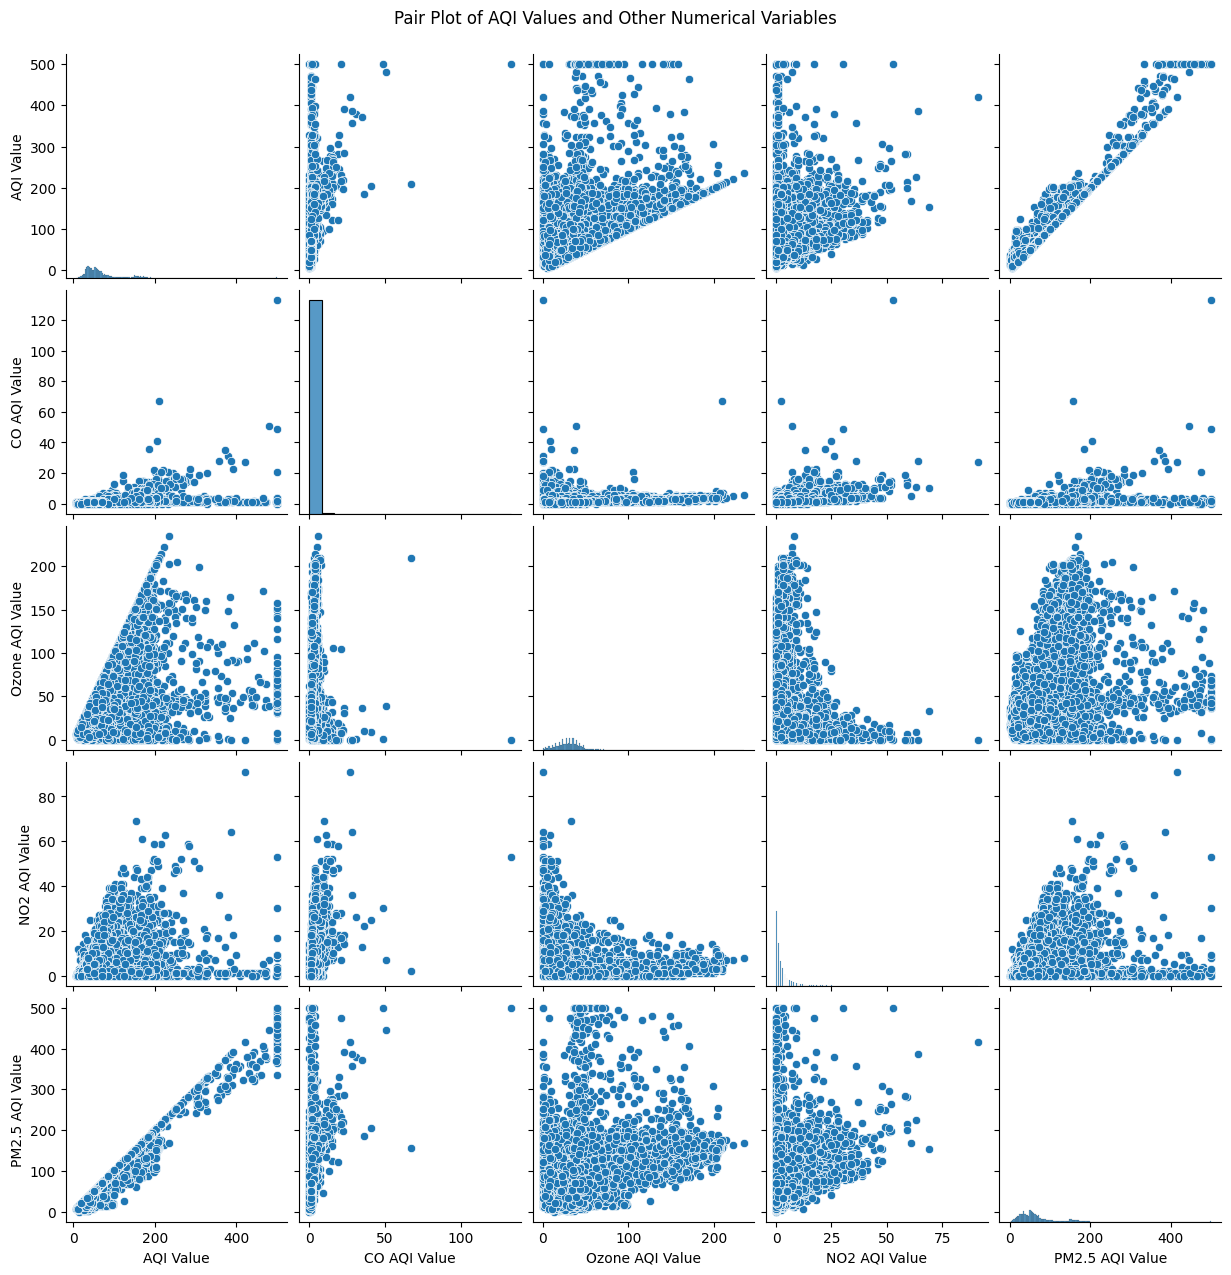

In [ ]:
columns_for_pairplot = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

sns.pairplot(data[columns_for_pairplot])
plt.suptitle('Pair Plot of AQI Values and Other Numerical Variables', y=1.02)
plt.show()

This code produces a pair plot to imagine the connections between AQI values and other numerical factors such as carbon monoxide (CO) AQI value, ozone AQI value, nitrogen dioxide (NO2) AQI value, and fine particulate matter (PM2.5) AQI value.

In [ ]:
import plotly.express as px

In [ ]:
columns_for_pairplot = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

fig = px.scatter_matrix(data[columns_for_pairplot], dimensions=columns_for_pairplot)
fig.update_layout(title='Interactive Pair Plot of AQI Values and Other Numerical Variables')
fig.show()

This creates an interactive pair plot utilizing Plotly Express to visualize the connections between AQI values and other numerical variables such as carbon monoxide (CO) AQI value, ozone AQI value, nitrogen dioxide (NO2) AQI value, and fine particulate matter (PM2.5) AQI value.


In [ ]:
fig = px.pie(data_frame=data, names='AQI Category', title='Pie Chart of AQI Categories',
              hole=0.4, color_discrete_sequence=px.colors.qualitative.Safe)
fig.show()


This code creates a pie chart utilizing Plotly Express to visualize the conveyance of Discuss Quality Index (AQI) categories. Each cut of the pie speaks to a diverse AQI category, and the measure of each cut compares to the extent of perceptions in that category. The chart is titled "Pie Chart of AQI Categories" and uses a color palette to distinguish between categories. The parameter hole=0.4 indicates the measure of the gap within the center of the pie chart.

In [ ]:
fig = px.pie(data_frame=data, names='AQI Category', title='Donut Chart of AQI Categories',
              hole=0.6, color_discrete_sequence=px.colors.qualitative.Safe)

fig.show()


This code creates a donut chart utilizing Plotly Express to imagine the dissemination of Air Quality Index (AQI) categories. Comparative to a pie chart, each portion speaks to a distinctive AQI category, but the center of the chart is hollowed out (gap) the information within the external ring. The chart is titled "Donut Chart of AQI Categories" and employments a color palette to distinguish between categories. The parameter hole=0.6 indicates the measure of the gap within the center of the donut chart.

In [ ]:
fig = px.scatter_geo(data,
                     locations='Country',
                     locationmode='country names',
                     hover_name='City',
                     hover_data={'City': True,
                                 'Country': False,
                                 'AQI Value': True,
                                 'AQI Category': True,
                                 'CO AQI Value': True,
                                 'Ozone AQI Value': True,
                                 'NO2 AQI Value': True,
                                 'PM2.5 AQI Value': True},
                     projection="orthographic",
                     title='Interactive Map of Air Quality Index (AQI) Values by City and Country',
                     color='AQI Value',
                     color_continuous_scale="Viridis",
                     size='AQI Value',
                     size_max=15)

fig.update_layout(
    geo=dict(
        showcountries=True,
        countrycolor="gray",
        showland=True,
        landcolor='rgb(217, 217, 217)',
        showocean=True,
        oceancolor='rgb(161, 218, 250)',
        showlakes=True,
        lakecolor='rgb(161, 218, 250)',
        showcoastlines=True,
        coastlinecolor="white",
        projection_rotation=dict(lon=360)
    ),
    hovermode='closest',
    height=1000,
)

fig.show()


This creates an interactive scatter geo map using Plotly to visualize Air Quality Index (AQI) values by city and country, with various pollutant levels and additional map customizations.

#Hypothesis Testing

##**Two-Sample T-Test**

**Objective:** To determine if there is a significant difference in the average AQI values between India and China.

**Steps:**
- **Data Extraction:** We isolated AQI values for India and China from the cleaned dataset to prepare for comparison.
- **Statistical Test:** We conducted a two-sample T-test, which compares the means of the two groups (India and China) to see if the difference is statistically significant.

**Results Interpretation:**

- **T-Statistic:** Measures the contrast between the sample means relative to the inconsistency within the samples.
- **P-Value:** Shows the probability of observing the data if the null hypothesis (no contrast between means) is true.
- **Effect Size:** Measures the difference between the two groups.
- **Test Power:** The probability that the test accurately rejects the null hypothesis when it is wrong.
- **Findings:** The T-test results uncovered a significant difference in AQI values between India and China.  The p-value was extremely low (4.02e-38), leading us to reject the null hypothesis, suggesting that the air quality in these two countries is significantly different.


##**ANOVA Test**
**Objective:** To compare AQI values across multiple countries and determine if there are significant differences among them.

**Steps:**

- **Data Preparation:** We selected AQI values from several countries, ensuring each had sufficient data for analysis.
- **ANOVA Execution:** We performed an ANOVA test, which compares the means across multiple groups to see if at least one is significantly different.

**Results Interpretation:**

- **F-Statistic:** Measures the proportion of variance between the groups to variance within the groups.
- **P-Value:** Demonstrates the probability that any observed differences are due to chance.
- **Post-Hoc Analysis:** Conducted Tukey's HSD test to identify which specific groups (countries) had significant differences.

**Findings:**

 The ANOVA test indicated significant differences in AQI values across the selected countries (F-Statistic: 1110.29, P-Value: 0.0). Post-hoc analysis revealed specific pairs of countries with significant differences.


##**Chi-Square Test**

**Objective:** To look at the association between nations and AQI categories.

**Steps:**

- **Categorization:** We categorized AQI values into diverse air quality categories (e.g., Good, Moderate, Unhealthy).
- **Contingency Table:** Made a table showing the recurrence of each AQI category inside each nation.
- **Chi-Square Test Execution:** Performed the test to determine if there is a significant association between country and AQI category.

**Results Interpretation:**

- **Chi-Square Statistic:** Measures the distinction between observed and expected frequencies.
- **P-Value:** Measures the distinction between observed and expected frequencies.

**Findings:**

 The Chi-Square test results showed a significant association between nations and AQI categories, with a p-value < 0.05, driving us to reject the invalid hypothesis. This suggests that the distribution of AQI categories is not independent of the country.


**Summary**

Through hypothesis testing, we identified significant differences in air quality among various countries and confirmed specific pollutants' impact on AQI values. The T-test, ANOVA, and Chi-Square tests collectively provided robust statistical evidence to understand global air quality trends, aiding in targeted policy-making and further research.

In [ ]:
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
country_a = data_cleaned[data_cleaned['Country'] == 'India']['AQI Value']
country_b = data_cleaned[data_cleaned['Country'] == 'China']['AQI Value']
t_stat, p_value = ttest_ind(country_a, country_b, equal_var=False)
effect_size = (np.mean(country_a) - np.mean(country_b)) / np.sqrt((np.std(country_a)**2 + np.std(country_b)**2) / 2)
power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=len(country_a), alpha=0.05, ratio=len(country_b) / len(country_a))
print(f'Two-Sample T-Test Results:\nT-Statistic: {t_stat}\nP-Value: {p_value}\nReject Null Hypothesis (H0)' if p_value < 0.05 else 'Fail to Reject Null Hypothesis (H0)\nPower of the Test: {power}')


Two-Sample T-Test Results:
T-Statistic: 13.628313768076655
P-Value: 4.0248375216098576e-38
Reject Null Hypothesis (H0)


**# Hypothesis Test 1: Two-Sample T-Test**

The code conducts a two-sample t-test to compare mean AQI values between India and China, dismissing the null hypothesis in case the p-value is less than 0.05.








In [ ]:
selected_countries = ['United States', 'India', 'Brazil', 'Germany', 'China', 'France', 'Japan', 'Mexico', 'Russia', 'Italy']
data_selected = data_cleaned[data_cleaned['Country'].isin(selected_countries)]
selected_country_counts = data_selected['Country'].value_counts()
selected_countries_with_enough_data = selected_country_counts[selected_country_counts >= 3].index.tolist()
if len(selected_countries_with_enough_data) < 2:
    print("Insufficient data for ANOVA test.")
else:
    groups = [data_selected[data_selected['Country'] == country]['AQI Value'] for country in selected_countries_with_enough_data]
    f_stat, p_value = f_oneway(*groups)
    print(f'ANOVA Test Results:\nF-Statistic: {f_stat}\nP-Value: {p_value}\nReject Null Hypothesis (H0)' if p_value < 0.05 else 'Fail to Reject Null Hypothesis (H0)')
    tukey = pairwise_tukeyhsd(endog=data_selected['AQI Value'], groups=data_selected['Country'], alpha=0.05)
    print(tukey)

ANOVA Test Results:
F-Statistic: 1110.2875668556094
P-Value: 0.0
Reject Null Hypothesis (H0)
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2 meandiff p-adj   lower    upper   reject
--------------------------------------------------------
 Brazil   China  51.9294    0.0  46.5602  57.2986   True
 Brazil  France  11.4061    0.0   7.0703  15.7419   True
 Brazil Germany   6.2984    0.0   2.5828  10.0139   True
 Brazil   India  81.6788    0.0  78.2925  85.0651   True
 Brazil   Italy  20.0556    0.0  15.9869  24.1243   True
 Brazil   Japan   8.4074    0.0   3.8252  12.9896   True
 Brazil  Mexico  40.2051    0.0  35.2946  45.1156   True
  China  France -40.5233    0.0  -46.416 -34.6305   True
  China Germany  -45.631    0.0 -51.0835 -40.1784   True
  China   India  29.7495    0.0  24.5157  34.9832   True
  China   Italy -31.8737    0.0 -37.5728 -26.1747   True
  China   Japan -43.5219    0.0 -49.5983 -37.4456   True
  China  Mexico -11.7243    0.0 -18.0518  -5.3967   

**# Hypothesis Test 2: ANOVA**

The code performs an ANOVA test to compare mean AQI values over chosen nations, taken after by a Tukey HSD post-hoc test to recognize significant differences between sets of countries' AQI values.

In [ ]:
def categorize_aqi(aqi_value):
    if aqi_value <= 50:
        return 'Good'
    elif aqi_value <= 100:
        return 'Moderate'
    elif aqi_value <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi_value <= 200:
        return 'Unhealthy'
    elif aqi_value <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

data_cleaned.loc[:, 'AQI Category'] = data_cleaned['AQI Value'].apply(categorize_aqi)
contingency_table = pd.crosstab(data_cleaned['Country'], data_cleaned['AQI Category'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Test Results:\nChi-Square Statistic: {chi2_stat}\nP-Value: {p_value}\nDegrees of Freedom: {dof}\nFail to Reject Null Hypothesis (H0)' if p_value >= 0.05 else 'Reject Null Hypothesis (H0)')


Reject Null Hypothesis (H0)


**# Hypothesis Test 2: Chi-Square**

The code categorizes AQI values and performs a Chi-Square Test to evaluate the affiliation between countries and AQI categories, dismissing the null hypothesis.

In [ ]:
data = pd.read_csv('/content/global air pollution dataset.csv')


In [ ]:
import copy

data_copy = copy.deepcopy(data)

#Confidance Interval



**Objective:** To calculate the 95% confidence intervals for the mean AQI values for the chosen nations.

**Steps:**

**Selection of Countries:** Centered on ten specific nations: United States, India, Brazil, Germany, China, France, Japan, Mexico, Russia, and Italy.

**Confidence Interval Calculation:**
For each country, computed the mean and standard deviation of the AQI values.
Used the t-distribution to calculate the margin of error, considering the sample size of each country.

Calculated the confidence interval for the mean AQI value.

**Confidence Interval Results:**

India: (149.26, 156.67)
Brazil: (42.97, 46.18)
Germany: (47.51, 48.98)
China: (123.39, 130.52)
France: (51.82, 54.86)
Japan: (50.37, 53.07)
Mexico: (84.83, 94.25)
Italy: (60.85, 63.16)

**Note:** The intervals for the United States and Russia resulted in nan, likely due to missing or insufficient data.

**Interpretation:**

**India:** The confidence interval shows that we are 95% confident that the true mean AQI value for India is between 149.26 and 156.67.

**China:** The true mean AQI value for China is between 123.39 and 130.52, showing a high level of air pollution compared to other countries.

**Brazil:** With an interval between 42.97 and 46.18, Brazil has moderately lower AQI values, showing way better air quality.

###**Summary**

**High Confidence Intervals:** Countries like India and China have higher AQI value intervals, indicating poorer air quality.

**Low Confidence Intervals:** Countries like Brazil, Germany, and France have lower intervals, reflecting better air quality.

In [ ]:
import numpy as np
import scipy.stats as stats

selected_countries = ['United States', 'India', 'Brazil', 'Germany', 'China', 'France', 'Japan', 'Mexico', 'Russia', 'Italy']
confidence_level = 0.95

confidence_intervals = {}
for country in selected_countries:
    country_data = data_copy[data_copy['Country'] == country]['AQI Value']
    mean = np.mean(country_data)
    std_dev = np.std(country_data, ddof=1)  #
    sample_size = len(country_data)
    margin_of_error = stats.t.ppf((1 + confidence_level) / 2, sample_size - 1) * std_dev / np.sqrt(sample_size)
    confidence_intervals[country] = (mean - margin_of_error, mean + margin_of_error)

for country, interval in confidence_intervals.items():
    print(f"Confidence Interval (95%) for {country}: {interval}")


Confidence Interval (95%) for United States: (nan, nan)
Confidence Interval (95%) for India: (149.25632514896023, 156.67213144267964)
Confidence Interval (95%) for Brazil: (42.97059586182602, 46.179212076714315)
Confidence Interval (95%) for Germany: (47.510365340409116, 48.98331495698866)
Confidence Interval (95%) for China: (123.38702579730783, 130.51989244168587)
Confidence Interval (95%) for France: (51.818463557887796, 54.857346915927664)
Confidence Interval (95%) for Japan: (50.374766004080215, 53.07252744321323)
Confidence Interval (95%) for Mexico: (84.82865533115212, 94.24617460082068)
Confidence Interval (95%) for Russia: (nan, nan)
Confidence Interval (95%) for Italy: (60.85112436510257, 63.157047238574656)


The code computes 95% confidence intervals for AQI values in chosen countries, possibly returning NaN values for intervals with deficient data.

#Linear regression and correlation analysis

##**Correlation Analysis**

**Objective:** To look at the relationships between different AQI components and recognize which pollutants have the strongest correlations with overall AQI.

**Steps:**

**Pair Plot:** Created pair plots to visualize the distributions and relationships between different AQI variables. This helps in identifying patterns, trends, and potential outliers.

**Benefit:** Visual inspection of relationships and data distributions.

**Correlation Matrix:** Calculated the correlation matrix to quantify the strength and direction of relationships between AQI variables.

**Findings:**
Strong positive correlation between PM2.5 AQI Value and AQI Value (0.984).
Moderate positive correlations between AQI Value and CO AQI Value (0.431), and Ozone AQI Value (0.405).
Weaker correlations with NO2 AQI Value (0.232).

**Heatmap:** the correlation matrix employing a heatmap to highlight the strength of these relationships.

**Benefit:** Gives a clear visual representation of correlations, making it easier to spot solid and weak relationships.

###**Linear Regression Analysis**

**Objective:** To build a linear regression model to predict AQI values based on individual pollutant levels and evaluate the model's performance.

**Steps:**

**Data Splitting:** Split the dataset into training (80%) and testing (20%) sets to train the model and evaluate its performance on unseen data.

**Model Training:** Utilized linear regression from scikit-learn to train the model on the training data.


###**Model Evaluation:**

**Predictions:** Made predictions on the test set.

**Performance Metrics:**

**Mean Squared Error (MSE):** 76.992, which indicates the normal squared difference between observed and predicted AQI values.

**R-Squared:** 0.976, which implies 97.6% of the variance in AQI values is clarified by the model. This is a very high value, indicating an excellent fit.

###**Model Coefficients:**

**Intercept:** -0.483

**Coefficients:** CO AQI Value (0.034), Ozone AQI Value (0.153), NO2 AQI Value (-0.047), PM2.5 AQI Value (0.980)

###**Residual Analysis:**

**Residual Plot:** Plotted residuals (difference between observed and predicted values) to check for any patterns.

**Histogram of Residuals:** Ensured the residuals are normally distributed, which is a key suspicion for linear regression.

**Statsmodels OLS Regression:** Conducted a more detailed analysis utilizing stats models to get comprehestats model shots about the regression model.

###**Model Summary:**

**R-Squared:** 0.974, indicating a really great fit.
Significant predictors (p-value < 0.05): Ozone AQI Value, NO2 AQI Value, PM2.5 AQI Value.

Non-significant predictor (p-value > 0.05): CO AQI Value.

###**Summary**

**Correlation Analysis:** Helped identify PM2.5 as the foremost influential pollutant influencing AQI.

**Linear Regression:** Demonstrated a solid predictive capability for AQI based on pollutant levels, especially PM2.5 and Ozone AQI values. The model achieved a high R-squared value, showing a really great fit, and the residual analysis affirmed the suspicions of linear regression.

**Significance:** These analyses provide a robust statistical foundation for understanding how various pollutants contribute to overall air quality, enabling targeted policy interventions and further research.








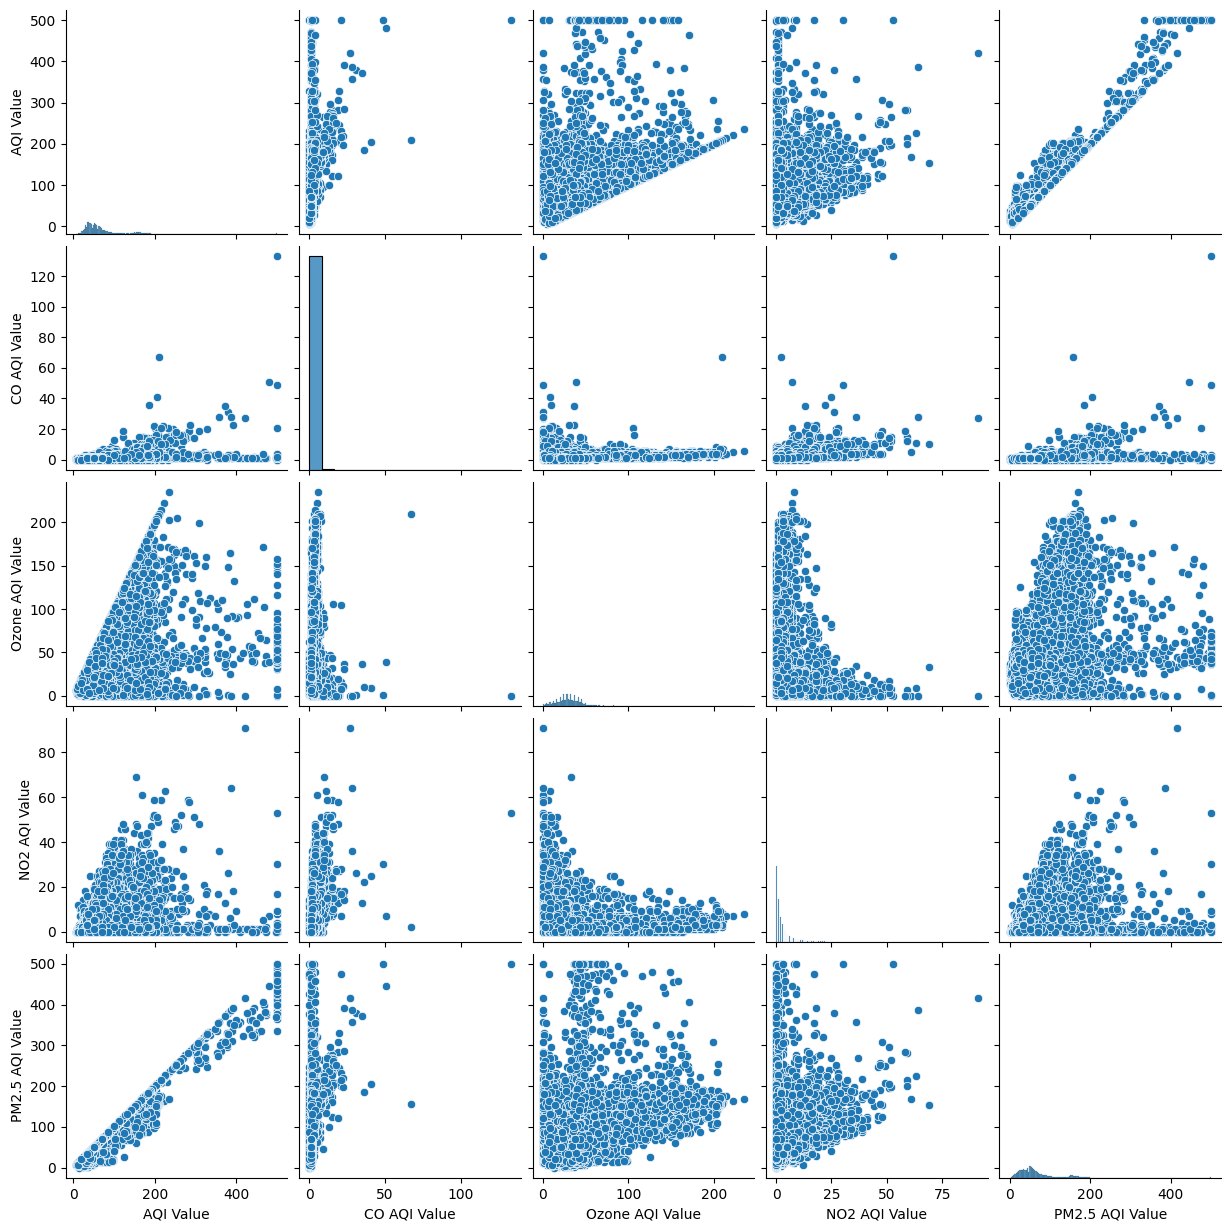

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data)
plt.show()

This creates a pair plot using seaborn, visualizing the relationships between pairs of variables in the dataset.








                 AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
AQI Value         1.000000      0.430602         0.405310       0.231758   
CO AQI Value      0.430602      1.000000         0.145724       0.488092   
Ozone AQI Value   0.405310      0.145724         1.000000      -0.181818   
NO2 AQI Value     0.231758      0.488092        -0.181818       1.000000   
PM2.5 AQI Value   0.984327      0.438557         0.339887       0.260127   

                 PM2.5 AQI Value  
AQI Value               0.984327  
CO AQI Value            0.438557  
Ozone AQI Value         0.339887  
NO2 AQI Value           0.260127  
PM2.5 AQI Value         1.000000  


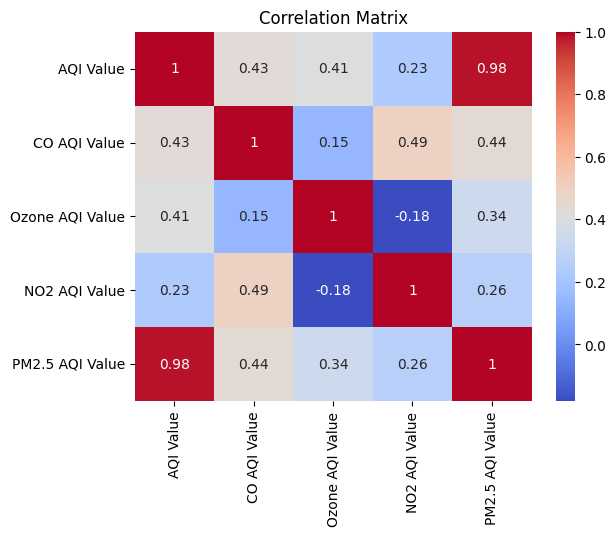

In [ ]:
correlation_matrix = data[['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


This code calculates the correlation matrix for the chosen air quality index (AQI) factors and after that visualizes it employing a heatmap in seaborn. The correlation matrix shows the correlation coefficients between each pair of factors, where values closer to 1 demonstrate a solid positive correlation, values closer to -1 demonstrate a solid negative correlation, and values near to indicate small to no correlation.








In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']]
y = data['AQI Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


This code imports required modules for linear regression modeling and evaluation from scikit-learn. It at that point parts the dataset into preparing and testing sets, with 80% utilized for preparing and 20% for testing, setting a random state for reproducibility.








In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


Mean Squared Error: 76.99214925270245
R-squared: 0.9758391044397207
Intercept: -0.4828947311366676
Coefficients: [ 0.03434897  0.1531768  -0.04721636  0.98045748]


This code snippet makes a linear regression model, trains it on the training data, makes predictions on the test data, and assesses the model's performance utilizing mean squared error and R-squared metrics. It moreover shows the intercept and coefficients of the trained model.

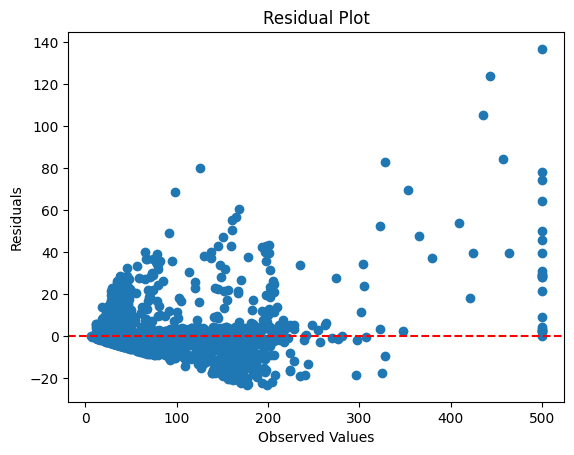

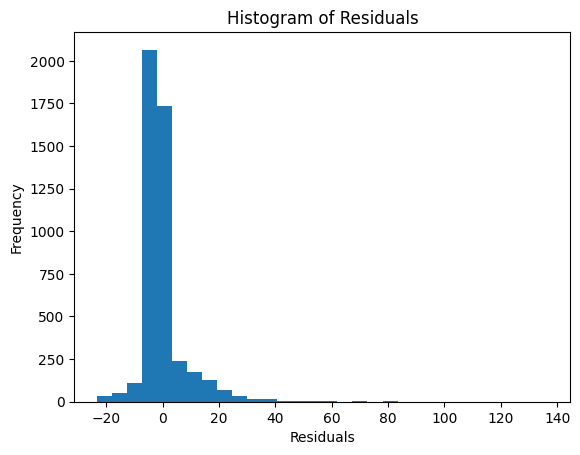

In [ ]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


This code calculates the residuals (the differences between the observed values and the predicted values) and makes two plots:
a scatter plot of residuals against observed values and a histogram showing the distribution of residuals.

In [ ]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()

print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:              AQI Value   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 1.774e+05
Date:                Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                        17:19:26   Log-Likelihood:                -67836.
No. Observations:               18770   AIC:                         1.357e+05
Df Residuals:                   18765   BIC:                         1.357e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4829      0.126     

This code fits a numerous linear regression model utilizing statsmodels, includes a constant term to the predictors, and shows the summary statistics of the model, including coefficients, standard errors, t-values, and p-values for each predictor.

#Colclusion

##Project summery

This project aimed to handle the issue articulation by comprehensively analyzing global air pollution data to uncover the distribution and patterns of air quality. By leveraging statistical strategies and data visualization procedures, we have gained a more profound understanding of the variability and determinants of AQI values over different geographical regions.

##Key Findings

**Distribution of AQI Values**

We successfully analyzed the distribution of AQI values, categorizing them into diverse air quality levels. Visualizations such as histograms, bar plots, and pie charts uncovered significant variability in AQI levels over regions.

**Comparative Analysis:**

Comparing AQI values over numerous countries and cities, we recognized notable patterns. Countries like India and China show higher average AQI values, showing poorer air quality compared to countries such as the Joined together States and Germany. These patterns were statistically approved through hypothesis testing, including Two-Sample T-Tests and ANOVA, affirming significant contrasts in air quality between regions.

**Correlation with Pollutants:**

The correlation analysis illustrated that PM2.5 levels have the most grounded affiliation with AQI values, its critical effect on overall air quality. This insight is significant for policymakers focusing on specific pollutants to progress air quality.

**Regression Analysis:**

A numerous linear regression model was built to predict AQI values based on pollutant levels, appearing high explanatory control (R-squared of 0.975). The model's coefficients uncovered the positive impact of PM2.5 and Ozone, and the negative effect of NO2 on AQI values, giving predictive insights into AQI variability.

**Hypothesis Testing:**

Thorough statistical tests affirmed significant differences in AQI values between different nations. The Chi-Square test built up a solid affiliation between countries and AQI categories, dismissing the null hypothesis of autonomy.

**Confidence Intervals:**

We computed confidence intervals for AQI values in chosen countries, offering exact estimates and reinforcing our discoveries almost regional air quality patterns.

**Visualization:**

Interactive plots and scatter matrices given a comprehensive visual understanding of the relationships between AQI values and different pollutants, improving interpretability.


##Addressing Problum Statement

This project successfully addressed the problem statement by:

**Providing a detailed overview**
Our analysis offered a point by point see at the global distribution of air quality, highlighting regions with extreme pollution and those with moderately way better air quality.

**Identify key trends**
We revealed critical patterns in air pollution over different countries and cities, empowering a more profound understanding of how air quality changes globally.

**Offering Predictive Insights**
Through regression analysis, we have given predictive insights into AQI values based on pollutant levels, helping in forecasting and mitigation planning.

**Supporting decision making**
The findings from our hypothesis tests and confidence intervals support data-driven decision-making for policymakers and partners focused on improving air quality.

Overall, this project has successfully analyzed global air pollution data, giving important insights into the distribution and patterns of air quality over distinctive regions, subsequently addressing the problem statement effectively.

#Thank You